In [1]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

In [2]:
# recall the sigmoid function
def sigmoid(x):
    return np.exp(x) / (1+np.exp(x))

In [3]:
def score(weights, bias, features):
    return np.dot(weights, features) + bias

In [4]:
def prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

In [16]:
def log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

In [15]:
# we now need the log loss over the entire dataset
def total_log_loss(weights, bias, features, label):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

In [13]:
# now it is time for our logistic regression trick 
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [18]:
# now it is time to put it all together
from utils import plot_points
import random


def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    return weights, bias, errors

([1.0526518648710794, 0.7362566038103961],
 -2.358746698575042,
 [8.665435613991765,
  8.667110106115322,
  8.670811856177904,
  8.67248149835866,
  8.676174701985385,
  8.608460833283326,
  8.612572546976114,
  8.441177046705825,
  8.375110222372804,
  8.376877923908344,
  8.208113288963883,
  8.14373245560385,
  8.028772928678338,
  7.898698119077942,
  7.786367878046057,
  7.72515723874617,
  7.664588789981722,
  7.667014959113252,
  7.672934701746817,
  7.513211620435744,
  7.519548816630468,
  7.41184793756299,
  7.25612305097651,
  7.259354849109932,
  7.262580792428854,
  7.143437410167965,
  7.150866978314742,
  7.033720062752377,
  7.04153046118428,
  7.048297840012195,
  6.898764355418583,
  6.799326973376753,
  6.654533853874201,
  6.602459531969748,
  6.461678191871865,
  6.466425723216103,
  6.471160557954844,
  6.480996211568424,
  6.485693483666334,
  6.490378325583758,
  6.498703335135093,
  6.448179862226636,
  6.456631025908025,
  6.460716763252661,
  6.35615372014804

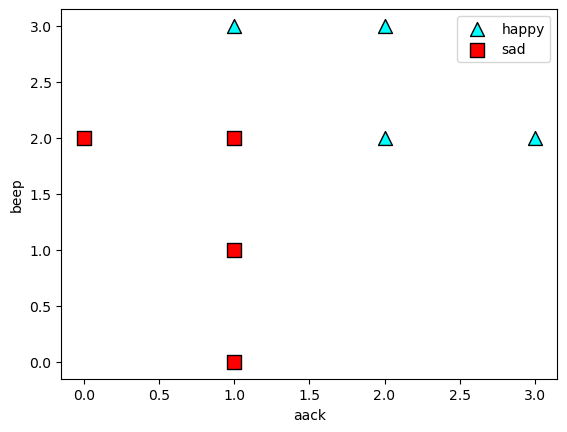

In [19]:
logistic_regression_algorithm(features, labels)

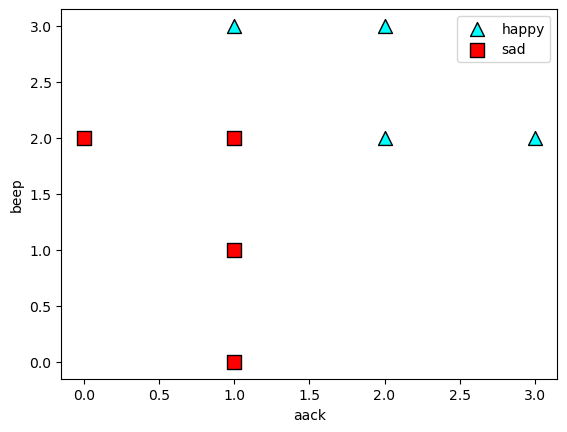

In [20]:
weights, bias, errors = logistic_regression_algorithm(features, labels)

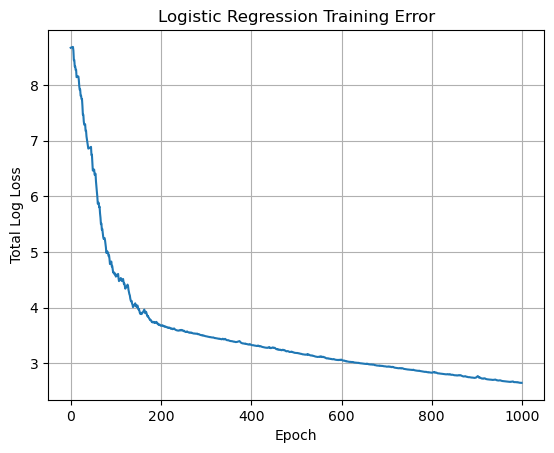

In [21]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Total Log Loss')
plt.title('Logistic Regression Training Error')
plt.grid(True)
plt.show()

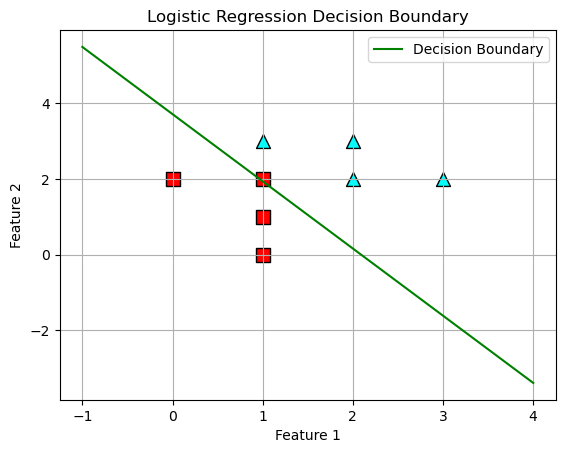

In [22]:
import numpy as np

# Plot the data points again
plot_points(features, labels)

# Plot the decision boundary
x_values = np.array([features[:, 0].min() - 1, features[:, 0].max() + 1])
w = np.array(weights)
b = bias
if w[1] != 0:
    y_values = -(w[0] * x_values + b) / w[1]
    plt.plot(x_values, y_values, color='green', label='Decision Boundary')
else:
    plt.axvline(x=-b/w[0], color='green', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()